# Coursera Capstone project

This notebook is created to analyse the problem in the Coursera Capstone project and build a solution

In [1]:
import pandas as pd
import numpy as np

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Introduction/Business Problem

The aim of this project is to show that road accident data can be used in tackling road safety in the future. The history of road accidents are classed by Severity index. In the future, successful tackling of safety should result in a measurable decrease of severity index across road incidents. 

Safety should be of utmost concern for any governing body. The guarantee of safe movement of population increases the confidence of the general public, their capability in work and decreases individual and collective stress, not to mention the pride in a safe locality. These leads to a rise in general productivity of a region. Due to these factors, a study of road safety will be of interest not only to road transport and maintenance authorities, but also to state administrations and economic players.

The principle followed in this project will be to analyze the available data of road incidents with their severity codes and study the relation with factors like road and environment conditions, the person and vehicle conditions and similar other factors. Using this proper study, we can build a model which can predict the severity of a road incident using the prevailing conditions.

With the results of this project, we can expect to gain a valuable insight into what a severe road accident depends on, and work towards mitigating those concerns. This will result in bringing a new, safer environment for general public travel.

In [4]:
df_collisions = pd.read_csv(r"https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df_collisions.head()

C:\Users\anil_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


From the sample of the data, a preliminary list of the affecting factors can be identified:
- Location type
- Number of vehicles involved
- Time of incident
- Juntion category
- Under the influence
- Weather conditions
- Road conditions
- Light conditions
- Driver error

Lets do a preliminary analysis of each of these factors.

In [7]:
df_loc = df_collisions[["SEVERITYCODE","ADDRTYPE"]]
df_loc.head()

,SEVERITYCODE,ADDRTYPE
0,2,Intersection
1,1,Block
2,1,Block
3,1,Block
4,2,Intersection


In [8]:
# matplotlib inline
import matplotlib.pyplot as plt

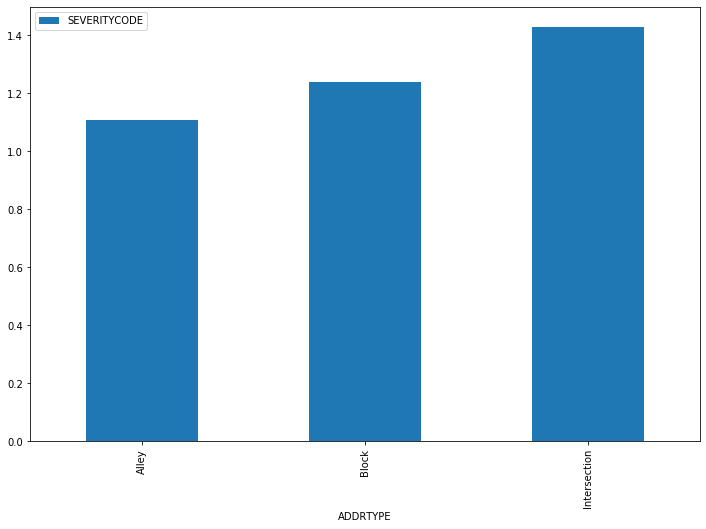

In [12]:
df_loc_mean = df_loc.groupby("ADDRTYPE").mean()
df_loc_mean.plot(kind="bar",figsize=(12,8))

The plot indicates that on average, a collision in an intersection tends to be more severe than in an alley or a block, but the difference is not very significant. So this factor will have a lesser weight.

In [17]:
df_no_veh = df_collisions[["SEVERITYCODE","PEDCOUNT","PEDCYLCOUNT","VEHCOUNT"]]
df_no_veh["VEH_PED"] = df_no_veh["VEHCOUNT"]+df_no_veh["PEDCOUNT"]
df_no_veh["VEH_CYL"] = df_no_veh["VEHCOUNT"]+df_no_veh["PEDCYLCOUNT"]
df_no_veh.head()

C:\Users\anil_\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\anil_\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,VEH_PED,VEH_CYL
0,2,0,0,2,2,2
1,1,0,0,2,2,2
2,1,0,0,3,3,3
3,1,0,0,3,3,3
4,2,0,0,2,2,2


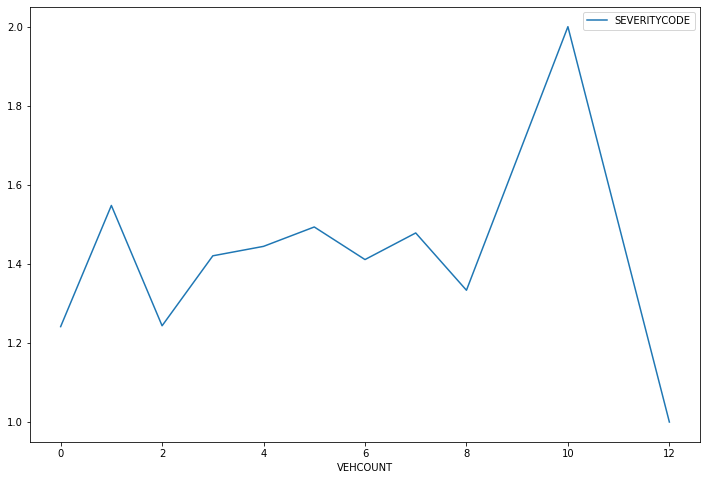

In [20]:
df_no_veh[["SEVERITYCODE","VEHCOUNT"]].groupby("VEHCOUNT").mean().plot(kind="line",figsize=(12,8))

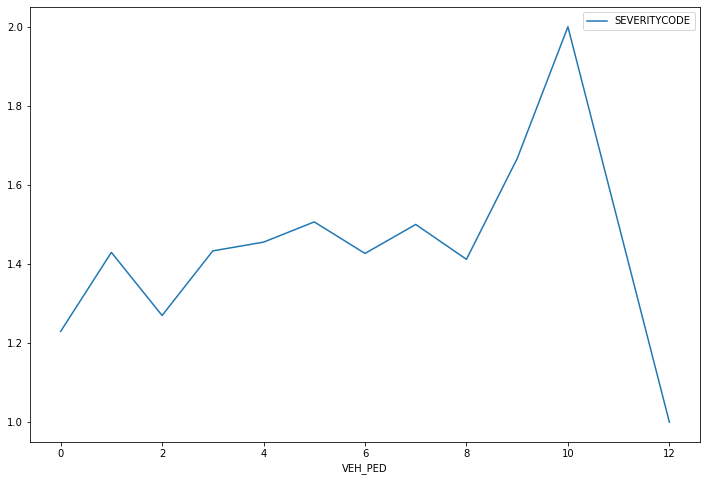

In [21]:
df_no_veh[["SEVERITYCODE","VEH_PED"]].groupby("VEH_PED").mean().plot(kind="line",figsize=(12,8))

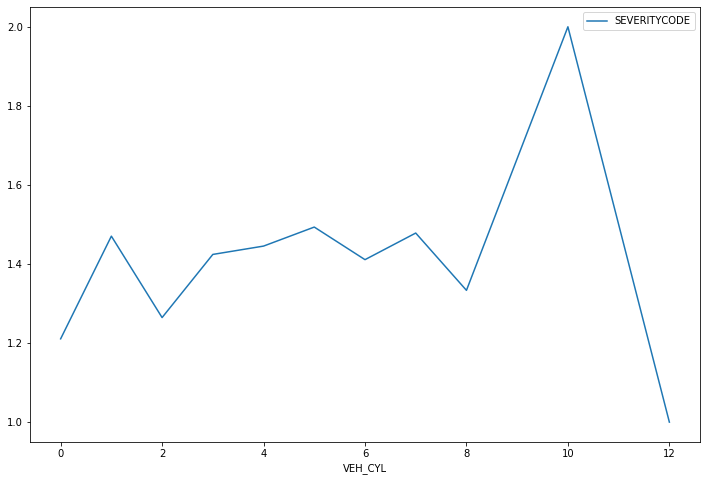

In [23]:
df_no_veh[["SEVERITYCODE","VEH_CYL"]].groupby("VEH_CYL").mean().plot(kind="line",figsize=(12,8))

I have created 3 plots to identify the relation between number of vehicles and the severity index.

1. Only cases with vehicles
2. Cases with vehicles and pedestrians
3. Cases with vehicles and cycles

The 3 graphs are almost equal, which shows that there is not really any effect with the presence of cyclists or pedestrians.
All the graphs display a variation in accident severity index with only the number of vehicles. But there is no measurable relationship in these graphs which can be used in severity index prediction.

In [32]:
import datetime as dt

df_time = df_collisions[["SEVERITYCODE","INCDTTM"]]
df_time["INCDTTM"] = pd.to_datetime(df_time["INCDTTM"])
df_time["INCTM"] = df_time["INCDTTM"].dt.time
df_time.head()

C:\Users\anil_\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\anil_\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,SEVERITYCODE,INCDTTM,INCTM
0,2,2013-03-27 14:54:00,14:54:00
1,1,2006-12-20 18:55:00,18:55:00
2,1,2004-11-18 10:20:00,10:20:00
3,1,2013-03-29 09:26:00,09:26:00
4,2,2004-01-28 08:04:00,08:04:00


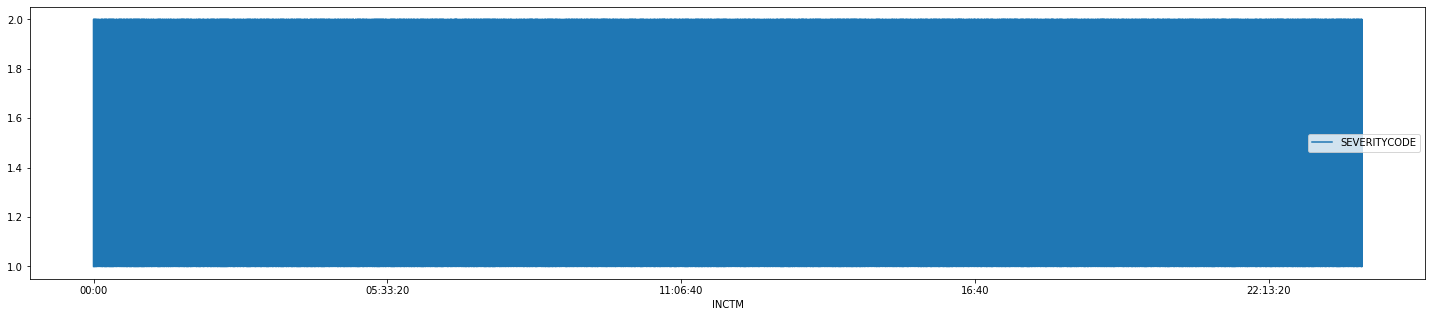

In [36]:
df_time[["SEVERITYCODE","INCTM"]].plot(kind="line",x="INCTM",figsize=(25,5))